In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#def load_data():
global smart
global gas
global weather
df =pd.read_csv("/datc/opschaler/smartmeter_data/P01S01W0373.csv",header=0,delimiter=";",parse_dates=['Timestamp', 'gasTimestamp'])

# Split the smartmeter and gasmeter data
smart = df.iloc[:,:7]
gas = df.iloc[:, 7:]

In [3]:
#load_data()

# Change all datetime columns to the same column name
smart = smart.rename(index=str, columns={"Timestamp":"datetime"})
gas = gas.rename(index=str, columns={"gasTimestamp":"datetime"})

#df = df[['datetime', 'eMeter', 'eMeterLow', 'ePower', 'gasMeter', 'T', 'Q']]
#df = df[['datetime', 'eMeter', 'eMeterLow', 'ePower', 'gasMeter']]
smart.head()

# Set datetime as index
smart = smart.set_index(['datetime'])
gas = gas.set_index(['datetime'])

In [4]:
"""
Resample the dataframes to 10s intervals.
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate
"""
smart = smart.resample('10s').mean()
gas = gas.resample('H').mean() # Does not look nice, but it works

In [5]:
smart.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn
datetime,,,,,,
2017-03-07 07:34:00,3673.459,0.0,4072.481,0.0,89.0,0.0
2017-03-07 07:34:10,3673.459,0.0,4072.481,0.0,87.0,0.0
2017-03-07 07:34:20,3673.460,0.0,4072.481,0.0,89.0,0.0
2017-03-07 07:34:30,3673.460,0.0,4072.481,0.0,89.0,0.0
2017-03-07 07:34:40,3673.460,0.0,4072.481,0.0,203.0,0.0


In [6]:
gas.head()

,gasMeter
datetime,
2017-03-07 07:00:00,4419.052
2017-03-07 08:00:00,4419.060
2017-03-07 09:00:00,4419.120
2017-03-07 10:00:00,4419.120
2017-03-07 11:00:00,4419.120


# Working with electricity dataframe

In [7]:
#First check how many nans are there
smart_nan=smart.isnull()
print(smart[smart_nan].head())

                     eMeter  eMeterReturn  eMeterLow  eMeterLowReturn  ePower  \
datetime                                                                        
2017-03-07 07:34:00     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:34:10     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:34:20     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:34:30     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:34:40     NaN           NaN        NaN              NaN     NaN   

                     ePowerReturn  
datetime                           
2017-03-07 07:34:00           NaN  
2017-03-07 07:34:10           NaN  
2017-03-07 07:34:20           NaN  
2017-03-07 07:34:30           NaN  
2017-03-07 07:34:40           NaN  


In [8]:
smart.describe()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn
count,185398.00000,185398.0,185398.000000,185398.0,185398.000000,185398.0
mean,3737.23959,0.0,4147.882695,0.0,496.777466,0.0
std,32.97624,0.0,45.862535,0.0,822.285670,0.0
min,3673.45900,0.0,4072.481000,0.0,76.000000,0.0
25%,3708.14200,0.0,4116.256250,0.0,159.000000,0.0
50%,3737.26900,0.0,4143.112000,0.0,217.000000,0.0
75%,3768.10600,0.0,4181.876000,0.0,369.000000,0.0
max,3793.72000,0.0,4221.775000,0.0,7639.000000,0.0


In [9]:
print(smart[smart_nan])

                     eMeter  eMeterReturn  eMeterLow  eMeterLowReturn  ePower  \
datetime                                                                        
2017-03-07 07:34:00     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:34:10     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:34:20     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:34:30     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:34:40     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:34:50     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:35:00     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:35:10     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:35:20     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:35:30     NaN           NaN        NaN              NaN     NaN   
2017-03-07 07:35:40     NaN 

In [10]:
#Then just interpolate
#smart_final=smart.interpolate('time')
#print(smart_final)

# Check if NaNs pop up in whole rows

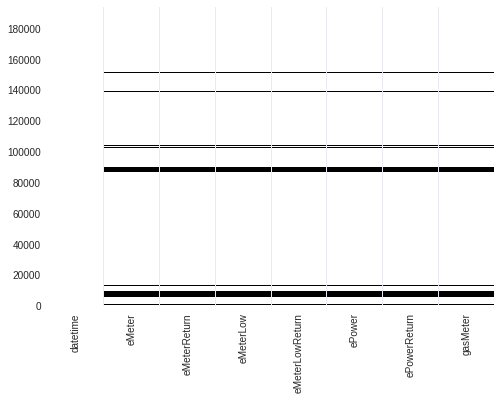

In [26]:
#make ints from NaNs
smart_nan=smart_nan*1
smart_nan_test = df
smart_nan_test = smart_nan_test.rename(index=str, columns={"Timestamp":"datetime"})
smart_nan_test = smart_nan_test.set_index(['datetime'])
smart_nan_test = smart_nan_test.resample('10s').mean()
smart_nan_test = smart_nan_test.reset_index()
smart_nan_test = smart_nan_test.isnull()
ax = sns.heatmap(smart_nan_test, cmap='gray_r', yticklabels = 20000, cbar = False)
ax.invert_yaxis()
plt.savefig('test_nans_vis_sensor_whole.png')
plt.show()

#make a df where the number of consecutive NaNs in that electricity file are displayed
#temp = pd.DataFrame()
#temp['temp']=smart_nan.groupby((smart_nan != smart_nan.shift()).cumsum()).transform('size') * smart_nan
#print(temp.head())

In [12]:
temp.to_csv('~/temp.csv')

NameError: name 'temp' is not defined

In [ ]:
temp.describe()

# Creating DF for information from the different files

In [ ]:
#create dataframe to store all information from the different files
info_data = pd.DataFrame()
info_data = pd.DataFrame(columns={'House_ID','File_size(MB)','Initial_Date','Final_Date','Days','Amount_of_NaNs','Max_Consecutive_NaNs'})
#order of column names changed for some reason, line(below) fixes this, although ugly
info_data = info_data[['House_ID','File_size(MB)','Initial_Date','Final_Date','Days','Amount_of_NaNs','Max_Consecutive_NaNs']]
info_data.loc[len(info_data.index)] = [123123, smart.memory_usage(index=True).sum()/1000000, smart.index[0], smart.index[-1], smart.index[-1]-smart.index[0], 6767, temp['temp'].max()]
print(info_data.head())

#Where the following things must be changed in order to make it work for the final function (I think): 
#123123 --> dwelling_id
#smart (everywhere) --> replace with df
#6767 --> NaN_count for df


In [ ]:
smart.isnull().sum()[0]

In [ ]:
#Delete rows with NaN in 'ePower' column
smart_final=smart.dropna(subset=['ePower'])
smart_final.isnull().sum()

# Working with gas dataframe

In [ ]:
#Inspect for NaNs
gas_nan=gas.isnull().any(axis=1)
print(gas[gas_nan])

In [ ]:
#Interpolate
gas_final = gas.resample('10s').interpolate(method='time')
# Create a ''gasPower'' column. This equals the gas used in that hour
gas_final['gasPower'] = gas_final['gasMeter'].diff()
# First entry is NaN, replace NaN by second entry
gas_final['gasPower'][0] = gas_final['gasPower'][1]
print(gas_final)

In [ ]:
#Fit datetimes
#gas_selected=gas_final.ix[smart_final.index[0]:gas_final.index[-1]]
#print(gas_selected)

In [ ]:
# Gas datetime ends at 23:00:00 (at least in this specific file) and Electricity date time ends at 23:59:50 so
# when merging final DateTime will be 23:00:00
df = pd.merge(smart_final,gas_final,left_index=True, right_index=True)

In [ ]:
print(df)